In [1]:
import data_loader as dl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
np.random.seed(0)

train_df, valid_df = dl.load_train_data("adult.data")
test_df = dl.load_test_data("adult.test")
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'martial.status',
                   'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
                   'hours.per.week', 'native.country', 'income']
train_df.columns = column_names
train_df.replace(' ?', np.nan, inplace=True)
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mode.fit(train_df)
imp_train_df = imp_mode.transform(train_df)
train_df = pd.DataFrame(imp_train_df, columns = column_names)

for col in ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']:
    train_df[col] = train_df[col].astype('int64')
for col in ['workclass', 'education', 'martial.status', 'occupation', 'relationship', 'race', 
            'sex', 'native.country', 'income']:
    train_df[col] = train_df[col].astype('category')
train_df['capital.gain.loss'] = train_df['capital.gain'] - train_df['capital.loss']
num_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'capital.gain.loss']
cat_features = ['workclass', 'education', 'martial.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
cat_features.remove("education")
cat_features.remove("relationship")
cat_features.remove("income")

for cat in cat_features:
    train_df = pd.concat([train_df,pd.get_dummies(train_df[cat], prefix='is')],axis=1)
    train_df.drop([cat],axis=1, inplace=True)
train_df['income.prediction'] = train_df.income.cat.codes
train_df.drop(labels=["fnlwgt", "education","relationship", "income"], axis = 1, inplace = True)

valid_df.columns = column_names
valid_df.replace(' ?', np.nan, inplace=True)
imp_train_df = imp_mode.transform(valid_df)
valid_df = pd.DataFrame(imp_train_df, columns = column_names)

for col in ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']:
    valid_df[col] = valid_df[col].astype('int64')
for col in ['workclass', 'education', 'martial.status', 'occupation', 'relationship', 'race', 
            'sex', 'native.country', 'income']:
    valid_df[col] = valid_df[col].astype('category')
valid_df['capital.gain.loss'] = valid_df['capital.gain'] - valid_df['capital.loss']
num_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'capital.gain.loss']
cat_features = ['workclass', 'education', 'martial.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
cat_features.remove("education")
cat_features.remove("relationship")
cat_features.remove("income")

for cat in cat_features:
    valid_df = pd.concat([valid_df,pd.get_dummies(valid_df[cat], prefix='is')],axis=1)
    valid_df.drop([cat],axis=1, inplace=True)
valid_df['income.prediction'] = valid_df.income.cat.codes
valid_df.drop(labels=["fnlwgt", "education","relationship", "income"], axis = 1, inplace = True)
missing_cols = set( train_df.columns ) - set( valid_df.columns )
for c in missing_cols:
    valid_df[c] = 0
valid_df = valid_df[train_df.columns]

test_df.columns = column_names
test_df.replace(' ?', np.nan, inplace=True)
imp_train_df = imp_mode.transform(test_df)
test_df = pd.DataFrame(imp_train_df, columns = column_names)

for col in ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']:
    test_df[col] = test_df[col].astype('int64')
for col in ['workclass', 'education', 'martial.status', 'occupation', 'relationship', 'race', 
            'sex', 'native.country', 'income']:
    test_df[col] = test_df[col].astype('category')
test_df['capital.gain.loss'] = test_df['capital.gain'] - test_df['capital.loss']
num_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'capital.gain.loss']
cat_features = ['workclass', 'education', 'martial.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
cat_features.remove("education")
cat_features.remove("relationship")
cat_features.remove("income")

for cat in cat_features:
    test_df = pd.concat([test_df,pd.get_dummies(test_df[cat], prefix='is')],axis=1)
    test_df.drop([cat],axis=1, inplace=True)
test_df['income.prediction'] = test_df.income.cat.codes
test_df.drop(labels=["fnlwgt", "education","relationship", "income"], axis = 1, inplace = True)
missing_cols = set( train_df.columns ) - set( test_df.columns )
for c in missing_cols:
    test_df[c] = 0
test_df = test_df[train_df.columns]

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping

train = train_df.values
X, Y= train[:,:-1], train[:,-1]
valid = valid_df.values
Xval, Yval = valid[:,:-1], valid[:,-1]
test = test_df.values
Xtst, Ytst = test[:,:-1], test[:,-1]

model = Sequential()
model.add(Dense(10, activation='relu', input_dim=X.shape[1]))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                840       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________
None


In [3]:
callback = [EarlyStopping(monitor='val_loss', min_delta=1e-8, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)]
model.fit(X, Y, epochs=100, validation_data=(Xval, Yval), callbacks=callback)

Instructions for updating:
Use tf.cast instead.
Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 1s 36us/step - loss: 1.5957 - acc: 0.7646 - val_loss: 1.4331 - val_acc: 0.7896
Epoch 2/100
29315/29315 [==============================] - 1s 23us/step - loss: 1.5188 - acc: 0.7889 - val_loss: 1.4182 - val_acc: 0.7939
Epoch 3/100
29315/29315 [==============================] - 1s 22us/step - loss: 1.5111 - acc: 0.7922 - val_loss: 1.4152 - val_acc: 0.7967
Epoch 4/100
29315/29315 [==============================] - 1s 22us/step - loss: 1.5063 - acc: 0.7940 - val_loss: 1.4146 - val_acc: 0.7994
Epoch 5/100
29315/29315 [==============================] - 1s 23us/step - loss: 1.5039 - acc: 0.7954 - val_loss: 1.4181 - val_acc: 0.7896
Epoch 6/100
29315/29315 [==============================] - 1s 23us/step - loss: 1.5021 - acc: 0.7967 - val_loss: 1.4122 - val_acc: 0.7945
Epoch 7/100
29315/29315 [==============================] - 1s 22us/step - l

In [4]:
print("NN")
Yhat = model.predict(Xval)
auc = roc_auc_score(Yval, Yhat)
print("AUC: {}".format(auc))

NN
AUC: 0.6318590634894894


In [5]:
L = list(range(0,11,1))
N = list(range(5,65,5))
tr_auc = np.zeros((len(L),len(N)))
va_auc = np.zeros((len(L),len(N)))

for i,l in enumerate(L):
    for j,n in enumerate(N):
        callback = [EarlyStopping(monitor='val_loss', min_delta=1e-8, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)]
        model = Sequential()
        model.add(Dense(n, activation='relu', input_dim=X.shape[1]))
        model.add(Dropout(0.2))
        for layer in range(l):   
            model.add(Dense(n, activation='relu'))
            model.add(Dropout(0.2))
        model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        print(model.summary())
        model.fit(X, Y, epochs=100, validation_data=(Xval, Yval), callbacks=callback)
        Yhat = model.predict(X)
        tr_auc[i][j] = roc_auc_score(Y, Yhat)
        Yhat = model.predict(Xval)
        va_auc[i][j] = roc_auc_score(Yval, Yhat)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 420       
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 426
Trainable params: 426
Non-trainable params: 0
_________________________________________________________________
None
Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 1s 39us/step - loss: 0.8496 - acc: 0.7558 - val_loss: 0.7614 - val_acc: 0.7659
Epoch 2/100
29315/29315 [==============================] - 1s 24us/step - loss: 0.7645 - acc: 0.7699 

29315/29315 [==============================] - 1s 25us/step - loss: 1.4333 - acc: 0.7902 - val_loss: 1.4085 - val_acc: 0.7936
Epoch 8/100
29315/29315 [==============================] - 1s 25us/step - loss: 1.4271 - acc: 0.7922 - val_loss: 1.4080 - val_acc: 0.7964
Epoch 9/100
29315/29315 [==============================] - 1s 25us/step - loss: 1.4256 - acc: 0.7937 - val_loss: 1.4099 - val_acc: 0.7887
Epoch 10/100
29315/29315 [==============================] - 1s 25us/step - loss: 1.4262 - acc: 0.7939 - val_loss: 1.4023 - val_acc: 0.8001
Epoch 11/100
29315/29315 [==============================] - 1s 25us/step - loss: 1.4356 - acc: 0.7948 - val_loss: 1.4051 - val_acc: 0.7994
Epoch 12/100
29315/29315 [==============================] - 1s 26us/step - loss: 1.4267 - acc: 0.7933 - val_loss: 1.4156 - val_acc: 0.7988
Epoch 13/100
29315/29315 [==============================] - 1s 26us/step - loss: 1.4224 - acc: 0.7955 - val_loss: 1.4016 - val_acc: 0.7998
Epoch 14/100
29315/29315 [================

Epoch 8/100
29315/29315 [==============================] - 1s 26us/step - loss: 1.1483 - acc: 0.7968 - val_loss: 1.0861 - val_acc: 0.7964
Epoch 9/100
29315/29315 [==============================] - 1s 27us/step - loss: 1.1526 - acc: 0.7964 - val_loss: 1.0841 - val_acc: 0.7991
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 40)                3360      
_________________________________________________________________
dropout_8 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 41        
Total params: 3,401
Trainable params: 3,401
Non-trainable params: 0
_________________________________________________________________
None
Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 1s 46us/step - 

Epoch 2/100
29315/29315 [==============================] - 1s 41us/step - loss: 1.5244 - acc: 0.7862 - val_loss: 1.4170 - val_acc: 0.7957
Epoch 3/100
29315/29315 [==============================] - 1s 41us/step - loss: 1.5128 - acc: 0.7912 - val_loss: 1.4144 - val_acc: 0.7957
Epoch 4/100
29315/29315 [==============================] - 1s 43us/step - loss: 1.5078 - acc: 0.7929 - val_loss: 1.4091 - val_acc: 0.8019
Epoch 5/100
29315/29315 [==============================] - 1s 42us/step - loss: 1.5043 - acc: 0.7926 - val_loss: 1.4076 - val_acc: 0.7991
Epoch 6/100
29315/29315 [==============================] - 1s 42us/step - loss: 1.5008 - acc: 0.7948 - val_loss: 1.4044 - val_acc: 0.8010
Epoch 7/100
29315/29315 [==============================] - 1s 42us/step - loss: 1.4992 - acc: 0.7947 - val_loss: 1.4063 - val_acc: 0.8010
Epoch 8/100
29315/29315 [==============================] - 1s 42us/step - loss: 1.4977 - acc: 0.7968 - val_loss: 1.4261 - val_acc: 0.7760
Epoch 9/100
29315/29315 [=========

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 2s 66us/step - loss: 1.3516 - acc: 0.7618 - val_loss: 1.2728 - val_acc: 0.7674
Epoch 2/100
29315/29315 [==============================] - 1s 32us/step - loss: 1.2568 - acc: 0.7655 - val_loss: 0.6703 - val_acc: 0.7693
Epoch 3/100
29315/29315 [==============================] - 1s 32us/step - loss: 0.9060 - acc: 0.7894 - val_loss: 0.8880 - val_acc: 0.7945
Epoch 4/100
29315/29315 [==============================] - 1s 33us/step - loss: 0.8321 - acc: 0.8008 - val_loss: 0.8772 - val_acc: 0.8047
Epoch 5/100
29315/29315 [==============================] - 1s 33us/step - loss: 0.8642 - acc: 0.8005 - val_loss: 0.5642 - val_acc: 0.8115
Epoch 6/100
29315/29315 [==============================] - 1s 33us/step - loss: 0.6017 - acc: 0.8004 - val_loss: 0.3773 - val_acc: 0.8145
Epoch 7/100
29315/29315 [==============================] - 1s 32us/step - loss: 0.3951 - acc: 0.8132 - val_loss: 0.3779 - v

29315/29315 [==============================] - 1s 35us/step - loss: 1.0698 - acc: 0.7899 - val_loss: 0.8806 - val_acc: 0.8081
Epoch 4/100
29315/29315 [==============================] - 1s 35us/step - loss: 0.8390 - acc: 0.8060 - val_loss: 0.8708 - val_acc: 0.8244
Epoch 5/100
29315/29315 [==============================] - 1s 36us/step - loss: 0.8614 - acc: 0.8078 - val_loss: 0.8715 - val_acc: 0.8121
Epoch 6/100
29315/29315 [==============================] - 1s 36us/step - loss: 0.8272 - acc: 0.8114 - val_loss: 0.8684 - val_acc: 0.8244
Epoch 7/100
29315/29315 [==============================] - 1s 34us/step - loss: 0.8552 - acc: 0.8124 - val_loss: 1.0860 - val_acc: 0.7998
Epoch 8/100
29315/29315 [==============================] - 1s 35us/step - loss: 1.1510 - acc: 0.7902 - val_loss: 1.0821 - val_acc: 0.8007
Epoch 9/100
29315/29315 [==============================] - 1s 36us/step - loss: 1.1512 - acc: 0.7935 - val_loss: 1.0818 - val_acc: 0.8059
Epoch 10/100
29315/29315 [====================

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 3s 106us/step - loss: 1.6081 - acc: 0.7612 - val_loss: 1.4097 - val_acc: 0.7954
Epoch 2/100
29315/29315 [==============================] - 2s 57us/step - loss: 1.5098 - acc: 0.7866 - val_loss: 1.4073 - val_acc: 0.7945
Epoch 3/100
29315/29315 [==============================] - 2s 57us/step - loss: 1.4957 - acc: 0.7910 - val_loss: 1.3993 - val_acc: 0.7884
Epoch 4/100
29315/29315 [==============================] - 2s 59us/step - loss: 1.4921 - acc: 0.7936 - val_loss: 1.3955 - val_acc: 0.7917
Epoch 5/100
29315/29315 [==============================] - 2s 57us/step - loss: 1.4904 - acc: 0.7932 - val_loss: 1.3932 - val_acc: 0.8001
Epoch 6/100
29315/29315 [==============================] - 2s 59us/step - loss: 1.4827 - acc: 0.7947 - val_loss: 1.3920 - val_acc: 0.7933
Epoch 7/100
29315/29315 [==============================] - 2s 60us/step - loss: 1.4809 - acc: 0.7965 - val_loss: 1.3903 - 

Epoch 9/100
29315/29315 [==============================] - 1s 40us/step - loss: 0.4093 - acc: 0.7946 - val_loss: 0.3737 - val_acc: 0.8056
Epoch 10/100
29315/29315 [==============================] - 1s 39us/step - loss: 0.3968 - acc: 0.8014 - val_loss: 0.3617 - val_acc: 0.8327
Epoch 11/100
29315/29315 [==============================] - 1s 41us/step - loss: 0.3849 - acc: 0.8002 - val_loss: 0.3668 - val_acc: 0.8306
Epoch 12/100
29315/29315 [==============================] - 1s 39us/step - loss: 0.3952 - acc: 0.7901 - val_loss: 0.3816 - val_acc: 0.7933
Epoch 13/100
29315/29315 [==============================] - 1s 39us/step - loss: 0.4640 - acc: 0.7840 - val_loss: 1.0889 - val_acc: 0.7942
Epoch 14/100
29315/29315 [==============================] - 1s 40us/step - loss: 0.4842 - acc: 0.7868 - val_loss: 0.3833 - val_acc: 0.7942
Epoch 15/100
29315/29315 [==============================] - 1s 39us/step - loss: 0.3967 - acc: 0.7884 - val_loss: 0.3803 - val_acc: 0.7954
____________________________

29315/29315 [==============================] - 1s 43us/step - loss: 0.4428 - acc: 0.7782 - val_loss: 0.3958 - val_acc: 0.7711
Epoch 5/100
29315/29315 [==============================] - 1s 44us/step - loss: 0.4020 - acc: 0.7819 - val_loss: 0.3826 - val_acc: 0.8047
Epoch 6/100
29315/29315 [==============================] - 1s 44us/step - loss: 0.3901 - acc: 0.7974 - val_loss: 0.3763 - val_acc: 0.8401
Epoch 7/100
29315/29315 [==============================] - 1s 44us/step - loss: 0.3788 - acc: 0.8097 - val_loss: 0.3630 - val_acc: 0.8167
Epoch 8/100
29315/29315 [==============================] - 1s 43us/step - loss: 0.3740 - acc: 0.8113 - val_loss: 0.3603 - val_acc: 0.8327
Epoch 9/100
29315/29315 [==============================] - 1s 44us/step - loss: 0.3674 - acc: 0.8140 - val_loss: 0.3558 - val_acc: 0.8238
Epoch 10/100
29315/29315 [==============================] - 1s 44us/step - loss: 0.3638 - acc: 0.8151 - val_loss: 0.3595 - val_acc: 0.8281
Epoch 11/100
29315/29315 [===================

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 3s 112us/step - loss: 1.4118 - acc: 0.7708 - val_loss: 1.2088 - val_acc: 0.7800
Epoch 2/100
29315/29315 [==============================] - 1s 46us/step - loss: 1.2054 - acc: 0.7968 - val_loss: 1.2007 - val_acc: 0.8112
Epoch 3/100
29315/29315 [==============================] - 1s 46us/step - loss: 1.1862 - acc: 0.8056 - val_loss: 1.2048 - val_acc: 0.8130
Epoch 4/100
29315/29315 [==============================] - 1s 46us/step - loss: 1.1778 - acc: 0.8081 - val_loss: 1.1928 - val_acc: 0.8133
Epoch 5/100
29315/29315 [==============================] - 1s 47us/step - loss: 1.1582 - acc: 0.8122 - val_loss: 1.1795 - val_acc: 0.8133
Epoch 6/100
29315/29315 [==============================] - 1s 46us/step - loss: 1.1535 - acc: 0.8121 - val_loss: 1.4110 - val_acc: 0.7927
Epoch 7/100
29315/29315 [==============================] - 1s 47us/step - loss: 1.4969 - acc: 0.7889 - val_loss: 1.4025 - 

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 4s 146us/step - loss: 1.4039 - acc: 0.7629 - val_loss: 1.4227 - val_acc: 0.7708
Epoch 2/100
29315/29315 [==============================] - 2s 71us/step - loss: 1.5106 - acc: 0.7689 - val_loss: 1.4093 - val_acc: 0.7930
Epoch 3/100
29315/29315 [==============================] - 2s 72us/step - loss: 1.4782 - acc: 0.7840 - val_loss: 1.3996 - val_acc: 0.7964
Epoch 4/100
29315/29315 [==============================] - 2s 76us/step - loss: 1.4926 - acc: 0.7845 - val_loss: 1.3973 - val_acc: 0.7979
Epoch 5/100
29315/29315 [==============================] - 2s 72us/step - loss: 1.4932 - acc: 0.7886 - val_loss: 1.4042 - val_acc: 0.7902
Epoch 6/100
29315/29315 [==============================] - 2s 74us/step - loss: 1.4843 - acc: 0.7915 - val_loss: 1.4009 - val_acc: 0.7840
Epoch 7/100
29315/29315 [==============================] - 2s 73us/step - loss: 1.5004 - acc: 0.7894 - val_loss: 1.4057 - 

29315/29315 [==============================] - 2s 53us/step - loss: 0.4912 - acc: 0.7917 - val_loss: 0.4482 - val_acc: 0.8056
Epoch 4/100
29315/29315 [==============================] - 2s 52us/step - loss: 0.4579 - acc: 0.7933 - val_loss: 0.4128 - val_acc: 0.7871
Epoch 5/100
29315/29315 [==============================] - 2s 53us/step - loss: 0.4362 - acc: 0.7925 - val_loss: 0.3939 - val_acc: 0.8050
Epoch 6/100
29315/29315 [==============================] - 2s 53us/step - loss: 0.4208 - acc: 0.7930 - val_loss: 0.3825 - val_acc: 0.8004
Epoch 7/100
29315/29315 [==============================] - 2s 52us/step - loss: 0.4074 - acc: 0.7963 - val_loss: 0.3757 - val_acc: 0.8053
Epoch 8/100
29315/29315 [==============================] - 2s 55us/step - loss: 0.4152 - acc: 0.8016 - val_loss: 0.3703 - val_acc: 0.8256
Epoch 9/100
29315/29315 [==============================] - 2s 55us/step - loss: 0.5657 - acc: 0.8008 - val_loss: 0.3662 - val_acc: 0.8299
Epoch 10/100
29315/29315 [====================

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 4s 141us/step - loss: 0.8593 - acc: 0.7695 - val_loss: 0.4937 - val_acc: 0.8035
Epoch 2/100
29315/29315 [==============================] - 2s 56us/step - loss: 0.4613 - acc: 0.7894 - val_loss: 0.3960 - val_acc: 0.8022
Epoch 3/100
29315/29315 [==============================] - 2s 55us/step - loss: 0.4175 - acc: 0.7905 - val_loss: 0.3931 - val_acc: 0.8053
Epoch 4/100
29315/29315 [==============================] - 2s 59us/step - loss: 0.4010 - acc: 0.7893 - val_loss: 0.3952 - val_acc: 0.7822
Epoch 5/100
29315/29315 [==============================] - 2s 56us/step - loss: 0.3935 - acc: 0.7884 - val_loss: 0.3782 - val_acc: 0.8028
Epoch 6/100
29315/29315 [==============================] - 2s 56us/step - loss: 0.3857 - acc: 0.7873 - val_loss: 0.3745 - val_acc: 0.7899
Epoch 7/100
29315/29315 [==============================] - 2s 56us/step - loss: 0.3788 - acc: 0.7859 - val_loss: 0.3730 - 

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 4s 149us/step - loss: 1.4388 - acc: 0.7653 - val_loss: 1.2123 - val_acc: 0.7807
Epoch 2/100
29315/29315 [==============================] - 2s 59us/step - loss: 1.0763 - acc: 0.7826 - val_loss: 0.4092 - val_acc: 0.7856
Epoch 3/100
29315/29315 [==============================] - 2s 59us/step - loss: 0.4198 - acc: 0.7867 - val_loss: 0.3796 - val_acc: 0.8142
Epoch 4/100
29315/29315 [==============================] - 2s 62us/step - loss: 0.3918 - acc: 0.7979 - val_loss: 1.0995 - val_acc: 0.7880
Epoch 5/100
29315/29315 [==============================] - 2s 58us/step - loss: 0.9970 - acc: 0.7854 - val_loss: 1.0893 - val_acc: 0.7961
Epoch 6/100
29315/29315 [==============================] - 2s 59us/step - loss: 0.4215 - acc: 0.8066 - val_loss: 0.3608 - val_acc: 0.8321
Epoch 7/100
29315/29315 [==============================] - 2s 57us/step - loss: 0.3662 - acc: 0.8175 - val_loss: 0.3620 - 

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 6s 200us/step - loss: 1.6099 - acc: 0.7512 - val_loss: 1.4330 - val_acc: 0.7674
Epoch 2/100
29315/29315 [==============================] - 3s 95us/step - loss: 1.2566 - acc: 0.7867 - val_loss: 1.1980 - val_acc: 0.7973
Epoch 3/100
29315/29315 [==============================] - 3s 95us/step - loss: 1.4764 - acc: 0.7806 - val_loss: 1.4303 - val_acc: 0.7779
Epoch 4/100
29315/29315 [==============================] - 3s 100us/step - loss: 1.5125 - acc: 0.7872 - val_loss: 1.4079 - val_acc: 0.8001
Epoch 5/100
29315/29315 [==============================] - 3s 96us/step - loss: 1.4649 - acc: 0.7940 - val_loss: 1.1944 - val_acc: 0.8075
Epoch 6/100
29315/29315 [==============================] - 3s 95us/step - loss: 1.2744 - acc: 0.8045 - val_loss: 1.4133 - val_acc: 0.8007
Epoch 7/100
29315/29315 [==============================] - 3s 96us/step - loss: 1.1723 - acc: 0.8103 - val_loss: 1.1981 -

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 5s 174us/step - loss: 0.6225 - acc: 0.7694 - val_loss: 0.5060 - val_acc: 0.8050
Epoch 2/100
29315/29315 [==============================] - 2s 68us/step - loss: 0.5334 - acc: 0.7763 - val_loss: 0.4921 - val_acc: 0.8044
Epoch 3/100
29315/29315 [==============================] - 2s 66us/step - loss: 0.5250 - acc: 0.7789 - val_loss: 0.4894 - val_acc: 0.8053
Epoch 4/100
29315/29315 [==============================] - 2s 64us/step - loss: 0.5196 - acc: 0.7777 - val_loss: 0.4845 - val_acc: 0.8050
Epoch 5/100
29315/29315 [==============================] - 2s 63us/step - loss: 0.5179 - acc: 0.7775 - val_loss: 0.4855 - val_acc: 0.7967
Epoch 6/100
29315/29315 [==============================] - 2s 64us/step - loss: 0.5120 - acc: 0.7795 - val_loss: 0.4812 - val_acc: 0.8059
Epoch 7/100
29315/29315 [==============================] - 2s 64us/step - loss: 0.5058 - acc: 0.7803 - val_loss: 0.4651 - 

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 5s 187us/step - loss: 0.8128 - acc: 0.7533 - val_loss: 0.5379 - val_acc: 0.7736
Epoch 2/100
29315/29315 [==============================] - 2s 68us/step - loss: 0.5257 - acc: 0.7879 - val_loss: 0.5040 - val_acc: 0.8059
Epoch 3/100
29315/29315 [==============================] - 2s 70us/step - loss: 0.5041 - acc: 0.7922 - val_loss: 0.4984 - val_acc: 0.7850
Epoch 4/100
29315/29315 [==============================] - 2s 68us/step - loss: 0.4955 - acc: 0.7942 - val_loss: 0.4937 - val_acc: 0.7859
Epoch 5/100
29315/29315 [==============================] - 2s 69us/step - loss: 0.4777 - acc: 0.7943 - val_loss: 0.4233 - val_acc: 0.7859
Epoch 6/100
29315/29315 [==============================] - 2s 72us/step - loss: 0.4259 - acc: 0.7992 - val_loss: 0.3972 - val_acc: 0.7868
Epoch 7/100
29315/29315 [==============================] - 2s 70us/step - loss: 0.4078 - acc: 0.8012 - val_loss: 0.3879 - 

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 6s 195us/step - loss: 0.7342 - acc: 0.7682 - val_loss: 0.4977 - val_acc: 0.8028
Epoch 2/100
29315/29315 [==============================] - 2s 72us/step - loss: 0.4698 - acc: 0.7902 - val_loss: 0.4037 - val_acc: 0.8053
Epoch 3/100
29315/29315 [==============================] - 2s 77us/step - loss: 0.4132 - acc: 0.7928 - val_loss: 0.3947 - val_acc: 0.8050
Epoch 4/100
29315/29315 [==============================] - 2s 74us/step - loss: 0.3994 - acc: 0.7912 - val_loss: 0.3816 - val_acc: 0.8056
Epoch 5/100
29315/29315 [==============================] - 2s 72us/step - loss: 0.3907 - acc: 0.7908 - val_loss: 0.3895 - val_acc: 0.8053
Epoch 6/100
29315/29315 [==============================] - 2s 72us/step - loss: 0.6629 - acc: 0.7784 - val_loss: 0.3762 - val_acc: 0.8047
Epoch 7/100
29315/29315 [==============================] - 2s 73us/step - loss: 0.3820 - acc: 0.7995 - val_loss: 0.3698 - 

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 6s 210us/step - loss: 0.8588 - acc: 0.7724 - val_loss: 0.4970 - val_acc: 0.7924
Epoch 2/100
29315/29315 [==============================] - 2s 80us/step - loss: 0.4811 - acc: 0.7873 - val_loss: 0.3966 - val_acc: 0.8047
Epoch 3/100
29315/29315 [==============================] - 2s 82us/step - loss: 0.4135 - acc: 0.7917 - val_loss: 0.3870 - val_acc: 0.8038
Epoch 4/100
29315/29315 [==============================] - 2s 80us/step - loss: 0.3991 - acc: 0.7907 - val_loss: 0.3855 - val_acc: 0.8053
Epoch 5/100
29315/29315 [==============================] - 2s 80us/step - loss: 0.3881 - acc: 0.7901 - val_loss: 0.3745 - val_acc: 0.7936
Epoch 6/100
29315/29315 [==============================] - 2s 79us/step - loss: 0.3816 - acc: 0.7893 - val_loss: 0.3762 - val_acc: 0.8047
Epoch 7/100
29315/29315 [==============================] - 2s 79us/step - loss: 0.3762 - acc: 0.7879 - val_loss: 0.3715 - 

29315/29315 [==============================] - 4s 128us/step - loss: 1.1449 - acc: 0.8189 - val_loss: 1.1771 - val_acc: 0.8041
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_237 (Dense)            (None, 60)                5040      
_________________________________________________________________
dropout_176 (Dropout)        (None, 60)                0         
_________________________________________________________________
dense_238 (Dense)            (None, 60)                3660      
_________________________________________________________________
dropout_177 (Dropout)        (None, 60)                0         
_________________________________________________________________
dense_239 (Dense)            (None, 60)                3660      
_________________________________________________________________
dropout_178 (Dropout)        (None, 60)                0         
_______________

Epoch 8/100
29315/29315 [==============================] - 3s 88us/step - loss: 0.3948 - acc: 0.8072 - val_loss: 0.3767 - val_acc: 0.8093
Epoch 9/100
29315/29315 [==============================] - 3s 85us/step - loss: 0.3881 - acc: 0.8122 - val_loss: 0.3715 - val_acc: 0.8121
Epoch 10/100
29315/29315 [==============================] - 3s 86us/step - loss: 0.3917 - acc: 0.8070 - val_loss: 0.3795 - val_acc: 0.7896
Epoch 11/100
29315/29315 [==============================] - 2s 85us/step - loss: 0.3911 - acc: 0.8078 - val_loss: 0.3760 - val_acc: 0.8031
Epoch 12/100
29315/29315 [==============================] - 3s 86us/step - loss: 0.3842 - acc: 0.8129 - val_loss: 0.3721 - val_acc: 0.8059
Epoch 13/100
29315/29315 [==============================] - 3s 91us/step - loss: 0.3800 - acc: 0.8156 - val_loss: 0.3721 - val_acc: 0.8065
Epoch 14/100
29315/29315 [==============================] - 3s 90us/step - loss: 0.3767 - acc: 0.8176 - val_loss: 0.3799 - val_acc: 0.7973
_____________________________

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 8s 257us/step - loss: 0.6417 - acc: 0.7651 - val_loss: 0.4666 - val_acc: 0.8053
Epoch 2/100
29315/29315 [==============================] - 3s 91us/step - loss: 0.4431 - acc: 0.7889 - val_loss: 0.3928 - val_acc: 0.8047
Epoch 3/100
29315/29315 [==============================] - 3s 92us/step - loss: 0.4081 - acc: 0.7906 - val_loss: 0.4008 - val_acc: 0.7739
Epoch 4/100
29315/29315 [==============================] - 3s 97us/step - loss: 0.3993 - acc: 0.7885 - val_loss: 0.3824 - val_acc: 0.8047
Epoch 5/100
29315/29315 [==============================] - 3s 92us/step - loss: 0.3947 - acc: 0.7873 - val_loss: 0.3776 - val_acc: 0.7967
Epoch 6/100
29315/29315 [==============================] - 3s 93us/step - loss: 0.3919 - acc: 0.7851 - val_loss: 0.3769 - val_acc: 0.7933
Epoch 7/100
29315/29315 [==============================] - 3s 93us/step - loss: 0.3851 - acc: 0.7854 - val_loss: 0.3849 - 

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 8s 275us/step - loss: 0.9112 - acc: 0.7654 - val_loss: 0.4963 - val_acc: 0.8013
Epoch 2/100
29315/29315 [==============================] - 3s 97us/step - loss: 0.4906 - acc: 0.7878 - val_loss: 0.4095 - val_acc: 0.7853
Epoch 3/100
29315/29315 [==============================] - 3s 99us/step - loss: 0.4205 - acc: 0.7899 - val_loss: 0.3927 - val_acc: 0.7871
Epoch 4/100
29315/29315 [==============================] - 3s 96us/step - loss: 0.3967 - acc: 0.7930 - val_loss: 0.3810 - val_acc: 0.7908
Epoch 5/100
29315/29315 [==============================] - 3s 97us/step - loss: 0.3827 - acc: 0.8027 - val_loss: 0.3719 - val_acc: 0.8346
Epoch 6/100
29315/29315 [==============================] - 3s 98us/step - loss: 0.3772 - acc: 0.8098 - val_loss: 0.3694 - val_acc: 0.8269
Epoch 7/100
29315/29315 [==============================] - 3s 100us/step - loss: 0.3678 - acc: 0.8157 - val_loss: 0.3788 -

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 9s 295us/step - loss: 0.8733 - acc: 0.7602 - val_loss: 0.4743 - val_acc: 0.8053
Epoch 2/100
29315/29315 [==============================] - 3s 105us/step - loss: 0.4533 - acc: 0.7851 - val_loss: 0.3933 - val_acc: 0.8047
Epoch 3/100
29315/29315 [==============================] - 3s 107us/step - loss: 0.4078 - acc: 0.7885 - val_loss: 0.3868 - val_acc: 0.8053
Epoch 4/100
29315/29315 [==============================] - 3s 105us/step - loss: 0.3915 - acc: 0.7893 - val_loss: 0.3809 - val_acc: 0.8044
Epoch 5/100
29315/29315 [==============================] - 3s 105us/step - loss: 0.3834 - acc: 0.7864 - val_loss: 0.3804 - val_acc: 0.7936
Epoch 6/100
29315/29315 [==============================] - 3s 105us/step - loss: 0.3786 - acc: 0.7910 - val_loss: 0.3723 - val_acc: 0.8343
Epoch 7/100
29315/29315 [==============================] - 3s 105us/step - loss: 0.3707 - acc: 0.8085 - val_loss: 0.3

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 11s 359us/step - loss: 1.6059 - acc: 0.7581 - val_loss: 1.4253 - val_acc: 0.7908
Epoch 2/100
29315/29315 [==============================] - 5s 164us/step - loss: 1.5232 - acc: 0.7765 - val_loss: 1.4209 - val_acc: 0.7893
Epoch 3/100
29315/29315 [==============================] - 5s 162us/step - loss: 1.5076 - acc: 0.7830 - val_loss: 1.3994 - val_acc: 0.7979
Epoch 4/100
29315/29315 [==============================] - 5s 163us/step - loss: 1.4997 - acc: 0.7854 - val_loss: 1.3984 - val_acc: 0.7924
Epoch 5/100
29315/29315 [==============================] - 5s 163us/step - loss: 1.4951 - acc: 0.7911 - val_loss: 1.3988 - val_acc: 0.8016
Epoch 6/100
29315/29315 [==============================] - 5s 163us/step - loss: 1.4913 - acc: 0.7918 - val_loss: 1.3981 - val_acc: 0.8022
Epoch 7/100
29315/29315 [==============================] - 5s 168us/step - loss: 1.4911 - acc: 0.7908 - val_loss: 1.

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 9s 316us/step - loss: 0.6252 - acc: 0.7708 - val_loss: 0.5026 - val_acc: 0.7840
Epoch 2/100
29315/29315 [==============================] - 3s 107us/step - loss: 0.4872 - acc: 0.7842 - val_loss: 0.4196 - val_acc: 0.8053
Epoch 3/100
29315/29315 [==============================] - 3s 106us/step - loss: 0.4487 - acc: 0.7862 - val_loss: 0.4074 - val_acc: 0.7945
Epoch 4/100
29315/29315 [==============================] - 3s 110us/step - loss: 0.4329 - acc: 0.7862 - val_loss: 0.4021 - val_acc: 0.7859
Epoch 5/100
29315/29315 [==============================] - 3s 110us/step - loss: 0.4345 - acc: 0.7856 - val_loss: 0.3991 - val_acc: 0.8038
Epoch 6/100
29315/29315 [==============================] - 3s 108us/step - loss: 0.4316 - acc: 0.7882 - val_loss: 0.3831 - val_acc: 0.8022
Epoch 7/100
29315/29315 [==============================] - 3s 107us/step - loss: 0.4255 - acc: 0.7927 - val_loss: 0.3

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 10s 337us/step - loss: 0.7007 - acc: 0.7712 - val_loss: 0.5063 - val_acc: 0.8053
Epoch 2/100
29315/29315 [==============================] - 3s 114us/step - loss: 0.5099 - acc: 0.7889 - val_loss: 0.4964 - val_acc: 0.7736
Epoch 3/100
29315/29315 [==============================] - 3s 115us/step - loss: 0.4803 - acc: 0.7898 - val_loss: 0.4182 - val_acc: 0.8044
Epoch 4/100
29315/29315 [==============================] - 3s 116us/step - loss: 0.4382 - acc: 0.7942 - val_loss: 0.4166 - val_acc: 0.7736
Epoch 5/100
29315/29315 [==============================] - 3s 117us/step - loss: 0.4133 - acc: 0.7961 - val_loss: 0.3974 - val_acc: 0.8059
Epoch 6/100
29315/29315 [==============================] - 3s 115us/step - loss: 0.4024 - acc: 0.7982 - val_loss: 0.3926 - val_acc: 0.7822
Epoch 7/100
29315/29315 [==============================] - 3s 117us/step - loss: 0.3956 - acc: 0.8030 - val_loss: 0.

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 11s 360us/step - loss: 0.7073 - acc: 0.7716 - val_loss: 0.4958 - val_acc: 0.8050
Epoch 2/100
29315/29315 [==============================] - 4s 121us/step - loss: 0.4655 - acc: 0.7909 - val_loss: 0.4032 - val_acc: 0.7850
Epoch 3/100
29315/29315 [==============================] - 4s 123us/step - loss: 0.4135 - acc: 0.7922 - val_loss: 0.3950 - val_acc: 0.7967
Epoch 4/100
29315/29315 [==============================] - 4s 125us/step - loss: 0.4032 - acc: 0.7912 - val_loss: 0.3937 - val_acc: 0.7871
Epoch 5/100
29315/29315 [==============================] - 4s 122us/step - loss: 0.3901 - acc: 0.7908 - val_loss: 0.3799 - val_acc: 0.8053
Epoch 6/100
29315/29315 [==============================] - 4s 122us/step - loss: 0.3876 - acc: 0.7923 - val_loss: 0.3769 - val_acc: 0.8050
Epoch 7/100
29315/29315 [==============================] - 4s 126us/step - loss: 0.3789 - acc: 0.8019 - val_loss: 0.

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 11s 380us/step - loss: 0.7154 - acc: 0.7644 - val_loss: 0.4679 - val_acc: 0.7831
Epoch 2/100
29315/29315 [==============================] - 4s 133us/step - loss: 0.4381 - acc: 0.7894 - val_loss: 0.3946 - val_acc: 0.8059
Epoch 3/100
29315/29315 [==============================] - 4s 129us/step - loss: 0.4020 - acc: 0.7910 - val_loss: 0.4039 - val_acc: 0.7822
Epoch 4/100
29315/29315 [==============================] - 4s 132us/step - loss: 0.3901 - acc: 0.7907 - val_loss: 0.3882 - val_acc: 0.8053
Epoch 5/100
29315/29315 [==============================] - 4s 132us/step - loss: 0.3840 - acc: 0.7888 - val_loss: 0.3944 - val_acc: 0.7998
Epoch 6/100
29315/29315 [==============================] - 4s 130us/step - loss: 0.3771 - acc: 0.7996 - val_loss: 0.3745 - val_acc: 0.8256
Epoch 7/100
29315/29315 [==============================] - 4s 131us/step - loss: 0.3744 - acc: 0.8085 - val_loss: 0.

Epoch 3/100
29315/29315 [==============================] - 6s 204us/step - loss: 0.3919 - acc: 0.7905 - val_loss: 0.3921 - val_acc: 0.8050
Epoch 4/100
29315/29315 [==============================] - 6s 203us/step - loss: 0.3825 - acc: 0.7892 - val_loss: 0.3754 - val_acc: 0.8204
Epoch 5/100
29315/29315 [==============================] - 6s 207us/step - loss: 0.3757 - acc: 0.8075 - val_loss: 0.3683 - val_acc: 0.8380
Epoch 6/100
29315/29315 [==============================] - 6s 204us/step - loss: 0.3672 - acc: 0.8149 - val_loss: 0.3625 - val_acc: 0.8404
Epoch 7/100
29315/29315 [==============================] - 6s 207us/step - loss: 0.3631 - acc: 0.8236 - val_loss: 0.3638 - val_acc: 0.8355
Epoch 8/100
29315/29315 [==============================] - 6s 203us/step - loss: 0.3609 - acc: 0.8222 - val_loss: 0.3631 - val_acc: 0.8404
Epoch 9/100
29315/29315 [==============================] - 6s 206us/step - loss: 0.3595 - acc: 0.8278 - val_loss: 0.3670 - val_acc: 0.8112
Epoch 10/100
29315/29315 [=

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 12s 412us/step - loss: 0.6078 - acc: 0.7725 - val_loss: 0.5211 - val_acc: 0.7723
Epoch 2/100
29315/29315 [==============================] - 4s 133us/step - loss: 0.5141 - acc: 0.7831 - val_loss: 0.4898 - val_acc: 0.7714
Epoch 3/100
29315/29315 [==============================] - 4s 137us/step - loss: 0.4828 - acc: 0.7851 - val_loss: 0.4367 - val_acc: 0.7840
Epoch 4/100
29315/29315 [==============================] - 4s 132us/step - loss: 0.4616 - acc: 0.7870 - val_loss: 0.4208 - val_acc: 0.7853
Epoch 5/100
29315/29315 [==============================] - 4s 131us/step - loss: 0.4457 - acc: 0.7888 - val_loss: 0.4109 - val_acc: 0.7840
Epoch 6/100
29315/29315 [==============================] - 4s 139us/step - loss: 0.4380 - acc: 0.7896 - val_loss: 0.4086 - val_acc: 0.7853
Epoch 7/100
29315/29315 [==============================] - 4s 132us/step - loss: 0.4298 - acc: 0.7921 - val_loss: 0.

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 13s 448us/step - loss: 0.7191 - acc: 0.7644 - val_loss: 0.4900 - val_acc: 0.7856
Epoch 2/100
29315/29315 [==============================] - 4s 152us/step - loss: 0.4823 - acc: 0.7872 - val_loss: 0.4093 - val_acc: 0.8050
Epoch 3/100
29315/29315 [==============================] - 4s 148us/step - loss: 0.4290 - acc: 0.7879 - val_loss: 0.3967 - val_acc: 0.8053
Epoch 4/100
29315/29315 [==============================] - 4s 152us/step - loss: 0.4056 - acc: 0.7939 - val_loss: 0.3860 - val_acc: 0.7853
Epoch 5/100
29315/29315 [==============================] - 4s 146us/step - loss: 0.3962 - acc: 0.7980 - val_loss: 0.3873 - val_acc: 0.7853
Epoch 6/100
29315/29315 [==============================] - 4s 146us/step - loss: 0.3844 - acc: 0.8059 - val_loss: 0.3750 - val_acc: 0.8081
Epoch 7/100
29315/29315 [==============================] - 4s 149us/step - loss: 0.3828 - acc: 0.8102 - val_loss: 0.

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 14s 483us/step - loss: 0.6569 - acc: 0.7660 - val_loss: 0.4906 - val_acc: 0.7862
Epoch 2/100
29315/29315 [==============================] - 5s 156us/step - loss: 0.4628 - acc: 0.7895 - val_loss: 0.4056 - val_acc: 0.8004
Epoch 3/100
29315/29315 [==============================] - 5s 160us/step - loss: 0.4100 - acc: 0.7921 - val_loss: 0.3950 - val_acc: 0.7859
Epoch 4/100
29315/29315 [==============================] - 5s 155us/step - loss: 0.3978 - acc: 0.7929 - val_loss: 0.3874 - val_acc: 0.7948
Epoch 5/100
29315/29315 [==============================] - 5s 159us/step - loss: 0.3871 - acc: 0.8019 - val_loss: 0.3780 - val_acc: 0.8253
Epoch 6/100
29315/29315 [==============================] - 5s 157us/step - loss: 0.3776 - acc: 0.8106 - val_loss: 0.3793 - val_acc: 0.7979
Epoch 7/100
29315/29315 [==============================] - 5s 158us/step - loss: 0.3742 - acc: 0.8149 - val_loss: 0.

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 17s 573us/step - loss: 0.8177 - acc: 0.7779 - val_loss: 0.4985 - val_acc: 0.7859
Epoch 2/100
29315/29315 [==============================] - 7s 235us/step - loss: 0.4549 - acc: 0.7903 - val_loss: 0.3970 - val_acc: 0.7859
Epoch 3/100
29315/29315 [==============================] - 7s 232us/step - loss: 0.3976 - acc: 0.7947 - val_loss: 0.3866 - val_acc: 0.7850
Epoch 4/100
29315/29315 [==============================] - 7s 235us/step - loss: 0.3841 - acc: 0.8052 - val_loss: 0.3769 - val_acc: 0.8176
Epoch 5/100
29315/29315 [==============================] - 7s 239us/step - loss: 0.3767 - acc: 0.8079 - val_loss: 0.3701 - val_acc: 0.8176
Epoch 6/100
29315/29315 [==============================] - 7s 233us/step - loss: 0.3754 - acc: 0.8114 - val_loss: 0.3751 - val_acc: 0.8115
Epoch 7/100
29315/29315 [==============================] - 7s 237us/step - loss: 0.3687 - acc: 0.8159 - val_loss: 0.

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 16s 531us/step - loss: 0.6159 - acc: 0.7676 - val_loss: 0.5490 - val_acc: 0.7837
Epoch 2/100
29315/29315 [==============================] - 5s 162us/step - loss: 0.5408 - acc: 0.7742 - val_loss: 0.5241 - val_acc: 0.7723
Epoch 3/100
29315/29315 [==============================] - 5s 168us/step - loss: 0.5222 - acc: 0.7797 - val_loss: 0.5063 - val_acc: 0.7840
Epoch 4/100
29315/29315 [==============================] - 5s 165us/step - loss: 0.5181 - acc: 0.7806 - val_loss: 0.5049 - val_acc: 0.7840
Epoch 5/100
29315/29315 [==============================] - 5s 162us/step - loss: 0.5167 - acc: 0.7824 - val_loss: 0.5005 - val_acc: 0.7859
Epoch 6/100
29315/29315 [==============================] - 5s 168us/step - loss: 0.5150 - acc: 0.7836 - val_loss: 0.5135 - val_acc: 0.7736
Epoch 7/100
29315/29315 [==============================] - 5s 163us/step - loss: 0.5140 - acc: 0.7844 - val_loss: 0.

29315/29315 [==============================] - 5s 178us/step - loss: 0.4818 - acc: 0.7896 - val_loss: 0.4220 - val_acc: 0.7822
Epoch 3/100
29315/29315 [==============================] - 5s 174us/step - loss: 0.4264 - acc: 0.7885 - val_loss: 0.4036 - val_acc: 0.7840
Epoch 4/100
29315/29315 [==============================] - 5s 177us/step - loss: 0.4140 - acc: 0.7913 - val_loss: 0.3964 - val_acc: 0.7850
Epoch 5/100
29315/29315 [==============================] - 5s 174us/step - loss: 0.3997 - acc: 0.7986 - val_loss: 0.3957 - val_acc: 0.7822
Epoch 6/100
29315/29315 [==============================] - 5s 177us/step - loss: 0.3972 - acc: 0.8016 - val_loss: 0.3858 - val_acc: 0.7874
Epoch 7/100
29315/29315 [==============================] - 5s 175us/step - loss: 0.3876 - acc: 0.8065 - val_loss: 0.3876 - val_acc: 0.7871
Epoch 8/100
29315/29315 [==============================] - 5s 178us/step - loss: 0.3847 - acc: 0.8066 - val_loss: 0.3803 - val_acc: 0.7877
Epoch 9/100
29315/29315 [==============

29315/29315 [==============================] - 5s 183us/step - loss: 0.3564 - acc: 0.8268 - val_loss: 0.3672 - val_acc: 0.8139
Epoch 24/100
29315/29315 [==============================] - 5s 178us/step - loss: 0.3562 - acc: 0.8304 - val_loss: 0.3604 - val_acc: 0.8336
Epoch 25/100
29315/29315 [==============================] - 5s 183us/step - loss: 0.3639 - acc: 0.8238 - val_loss: 0.3869 - val_acc: 0.7991
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_581 (Dense)            (None, 30)                2520      
_________________________________________________________________
dropout_478 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_582 (Dense)            (None, 30)                930       
_________________________________________________________________
dropout_479 (Dropout)        (None, 30)                0         

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 18s 604us/step - loss: 0.6174 - acc: 0.7718 - val_loss: 0.5000 - val_acc: 0.7970
Epoch 2/100
29315/29315 [==============================] - 6s 189us/step - loss: 0.4932 - acc: 0.7888 - val_loss: 0.4299 - val_acc: 0.7739
Epoch 3/100
29315/29315 [==============================] - 6s 190us/step - loss: 0.4224 - acc: 0.7926 - val_loss: 0.4128 - val_acc: 0.7840
Epoch 4/100
29315/29315 [==============================] - 6s 190us/step - loss: 0.4022 - acc: 0.7980 - val_loss: 0.3927 - val_acc: 0.7837
Epoch 5/100
29315/29315 [==============================] - 6s 190us/step - loss: 0.3878 - acc: 0.8056 - val_loss: 0.3856 - val_acc: 0.7859
Epoch 6/100
29315/29315 [==============================] - 6s 190us/step - loss: 0.3817 - acc: 0.8054 - val_loss: 0.3837 - val_acc: 0.7887
Epoch 7/100
29315/29315 [==============================] - 6s 191us/step - loss: 0.3788 - acc: 0.8105 - val_loss: 0.

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 21s 727us/step - loss: 0.5828 - acc: 0.7761 - val_loss: 0.4270 - val_acc: 0.8047
Epoch 2/100
29315/29315 [==============================] - 8s 283us/step - loss: 0.4100 - acc: 0.7889 - val_loss: 0.4141 - val_acc: 0.7871
Epoch 3/100
29315/29315 [==============================] - 8s 283us/step - loss: 0.3914 - acc: 0.7922 - val_loss: 0.3754 - val_acc: 0.8022
Epoch 4/100
29315/29315 [==============================] - 8s 283us/step - loss: 0.3841 - acc: 0.8009 - val_loss: 0.3791 - val_acc: 0.8099
Epoch 5/100
29315/29315 [==============================] - 8s 280us/step - loss: 0.3740 - acc: 0.8134 - val_loss: 0.3729 - val_acc: 0.8272
Epoch 6/100
29315/29315 [==============================] - 8s 284us/step - loss: 0.3690 - acc: 0.8156 - val_loss: 0.3678 - val_acc: 0.8019
Epoch 7/100
29315/29315 [==============================] - 8s 285us/step - loss: 0.3665 - acc: 0.8176 - val_loss: 0.

29315/29315 [==============================] - 20s 679us/step - loss: 0.5949 - acc: 0.7704 - val_loss: 0.5159 - val_acc: 0.7837
Epoch 2/100
29315/29315 [==============================] - 6s 202us/step - loss: 0.5292 - acc: 0.7749 - val_loss: 0.5058 - val_acc: 0.7837
Epoch 3/100
29315/29315 [==============================] - 6s 204us/step - loss: 0.5243 - acc: 0.7787 - val_loss: 0.5056 - val_acc: 0.7837
Epoch 4/100
29315/29315 [==============================] - 6s 205us/step - loss: 0.5209 - acc: 0.7798 - val_loss: 0.5110 - val_acc: 0.7736
Epoch 5/100
29315/29315 [==============================] - 6s 210us/step - loss: 0.5190 - acc: 0.7809 - val_loss: 0.5083 - val_acc: 0.7819
Epoch 6/100
29315/29315 [==============================] - 6s 202us/step - loss: 0.5178 - acc: 0.7816 - val_loss: 0.5127 - val_acc: 0.7733
Epoch 7/100
29315/29315 [==============================] - 6s 206us/step - loss: 0.5175 - acc: 0.7818 - val_loss: 0.5049 - val_acc: 0.7840
Epoch 8/100
29315/29315 [=============

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 21s 710us/step - loss: 0.5903 - acc: 0.7765 - val_loss: 0.5047 - val_acc: 0.7837
Epoch 2/100
29315/29315 [==============================] - 6s 214us/step - loss: 0.5074 - acc: 0.7874 - val_loss: 0.4884 - val_acc: 0.7736
Epoch 3/100
29315/29315 [==============================] - 6s 212us/step - loss: 0.4793 - acc: 0.7878 - val_loss: 0.4270 - val_acc: 0.7840
Epoch 4/100
29315/29315 [==============================] - 6s 214us/step - loss: 0.4508 - acc: 0.7887 - val_loss: 0.4158 - val_acc: 0.7723
Epoch 5/100
29315/29315 [==============================] - 6s 216us/step - loss: 0.4307 - acc: 0.7906 - val_loss: 0.4018 - val_acc: 0.7853
Epoch 6/100
29315/29315 [==============================] - 6s 211us/step - loss: 0.4173 - acc: 0.7910 - val_loss: 0.3938 - val_acc: 0.8047
Epoch 7/100
29315/29315 [==============================] - 6s 213us/step - loss: 0.4138 - acc: 0.7910 - val_loss: 0.

Epoch 16/100
29315/29315 [==============================] - 6s 216us/step - loss: 0.3793 - acc: 0.8182 - val_loss: 0.3750 - val_acc: 0.7865
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_695 (Dense)            (None, 25)                2100      
_________________________________________________________________
dropout_581 (Dropout)        (None, 25)                0         
_________________________________________________________________
dense_696 (Dense)            (None, 25)                650       
_________________________________________________________________
dropout_582 (Dropout)        (None, 25)                0         
_________________________________________________________________
dense_697 (Dense)            (None, 25)                650       
_________________________________________________________________
dropout_583 (Dropout)        (None, 25)                0         
__

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 22s 767us/step - loss: 0.6186 - acc: 0.7724 - val_loss: 0.5041 - val_acc: 0.7723
Epoch 2/100
29315/29315 [==============================] - 7s 231us/step - loss: 0.4704 - acc: 0.7883 - val_loss: 0.4072 - val_acc: 0.7714
Epoch 3/100
29315/29315 [==============================] - 7s 229us/step - loss: 0.4095 - acc: 0.7911 - val_loss: 0.3969 - val_acc: 0.7967
Epoch 4/100
29315/29315 [==============================] - 7s 230us/step - loss: 0.3995 - acc: 0.7899 - val_loss: 0.3945 - val_acc: 0.8059
Epoch 5/100
29315/29315 [==============================] - 7s 230us/step - loss: 0.3906 - acc: 0.7939 - val_loss: 0.3840 - val_acc: 0.7859
Epoch 6/100
29315/29315 [==============================] - 7s 228us/step - loss: 0.3798 - acc: 0.8052 - val_loss: 0.3830 - val_acc: 0.7865
Epoch 7/100
29315/29315 [==============================] - 7s 230us/step - loss: 0.3793 - acc: 0.8073 - val_loss: 0.

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 23s 799us/step - loss: 1.2381 - acc: 0.7668 - val_loss: 0.5177 - val_acc: 0.7714
Epoch 2/100
29315/29315 [==============================] - 7s 241us/step - loss: 0.5051 - acc: 0.7898 - val_loss: 0.4983 - val_acc: 0.7736
Epoch 3/100
29315/29315 [==============================] - 7s 240us/step - loss: 0.4542 - acc: 0.7907 - val_loss: 0.4184 - val_acc: 0.7831
Epoch 4/100
29315/29315 [==============================] - 7s 239us/step - loss: 0.4028 - acc: 0.7972 - val_loss: 0.4015 - val_acc: 0.7736
Epoch 5/100
29315/29315 [==============================] - 7s 244us/step - loss: 0.3923 - acc: 0.8008 - val_loss: 0.3944 - val_acc: 0.7853
Epoch 6/100
29315/29315 [==============================] - 7s 244us/step - loss: 0.3787 - acc: 0.8112 - val_loss: 0.3874 - val_acc: 0.7736
Epoch 7/100
29315/29315 [==============================] - 7s 238us/step - loss: 0.3731 - acc: 0.8138 - val_loss: 0.

Epoch 17/100
29315/29315 [==============================] - 7s 245us/step - loss: 0.3522 - acc: 0.8305 - val_loss: 0.3680 - val_acc: 0.7893
Epoch 18/100
29315/29315 [==============================] - 7s 249us/step - loss: 0.3519 - acc: 0.8291 - val_loss: 0.3627 - val_acc: 0.8173
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_750 (Dense)            (None, 50)                4200      
_________________________________________________________________
dropout_631 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_751 (Dense)            (None, 50)                2550      
_________________________________________________________________
dropout_632 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_752 (Dense)            (None, 50)                2550 

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 28s 947us/step - loss: 0.6055 - acc: 0.7724 - val_loss: 0.4177 - val_acc: 0.7859
Epoch 2/100
29315/29315 [==============================] - 10s 354us/step - loss: 0.4104 - acc: 0.7874 - val_loss: 0.4001 - val_acc: 0.7840
Epoch 3/100
29315/29315 [==============================] - 10s 352us/step - loss: 0.3973 - acc: 0.7900 - val_loss: 0.3934 - val_acc: 0.8059
Epoch 4/100
29315/29315 [==============================] - 10s 351us/step - loss: 0.3881 - acc: 0.7897 - val_loss: 0.3820 - val_acc: 0.8056
Epoch 5/100
29315/29315 [==============================] - 10s 354us/step - loss: 0.3825 - acc: 0.7916 - val_loss: 0.3791 - val_acc: 0.8053
Epoch 6/100
29315/29315 [==============================] - 10s 354us/step - loss: 0.3744 - acc: 0.8068 - val_loss: 0.3805 - val_acc: 0.7874
Epoch 7/100
29315/29315 [==============================] - 10s 354us/step - loss: 0.3678 - acc: 0.8130 - val_lo

29315/29315 [==============================] - 7s 253us/step - loss: 0.4583 - acc: 0.7826 - val_loss: 0.4026 - val_acc: 0.7982
Epoch 25/100
29315/29315 [==============================] - 7s 253us/step - loss: 0.4492 - acc: 0.7776 - val_loss: 0.4053 - val_acc: 0.7998
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_795 (Dense)            (None, 10)                840       
_________________________________________________________________
dropout_672 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_796 (Dense)            (None, 10)                110       
_________________________________________________________________
dropout_673 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_797 (Dense)            (None, 10)                110       
_______

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 27s 920us/step - loss: 0.5925 - acc: 0.7720 - val_loss: 0.5081 - val_acc: 0.7723
Epoch 2/100
29315/29315 [==============================] - 8s 265us/step - loss: 0.5072 - acc: 0.7863 - val_loss: 0.4895 - val_acc: 0.7714
Epoch 3/100
29315/29315 [==============================] - 8s 262us/step - loss: 0.4643 - acc: 0.7876 - val_loss: 0.4135 - val_acc: 0.7723
Epoch 4/100
29315/29315 [==============================] - 8s 265us/step - loss: 0.4287 - acc: 0.7895 - val_loss: 0.4012 - val_acc: 0.7871
Epoch 5/100
29315/29315 [==============================] - 8s 266us/step - loss: 0.4169 - acc: 0.7890 - val_loss: 0.4022 - val_acc: 0.7837
Epoch 6/100
29315/29315 [==============================] - 8s 262us/step - loss: 0.4092 - acc: 0.7884 - val_loss: 0.4030 - val_acc: 0.7714
Epoch 7/100
29315/29315 [==============================] - 8s 268us/step - loss: 0.4026 - acc: 0.7914 - val_loss: 0.

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 29s 974us/step - loss: 0.5904 - acc: 0.7768 - val_loss: 0.5037 - val_acc: 0.7723
Epoch 2/100
29315/29315 [==============================] - 8s 287us/step - loss: 0.4748 - acc: 0.7880 - val_loss: 0.4120 - val_acc: 0.7736
Epoch 3/100
29315/29315 [==============================] - 9s 290us/step - loss: 0.4157 - acc: 0.7896 - val_loss: 0.3992 - val_acc: 0.7736
Epoch 4/100
29315/29315 [==============================] - 8s 288us/step - loss: 0.4021 - acc: 0.7906 - val_loss: 0.3968 - val_acc: 0.7840
Epoch 5/100
29315/29315 [==============================] - 8s 283us/step - loss: 0.3912 - acc: 0.7941 - val_loss: 0.4023 - val_acc: 0.7723
Epoch 6/100
29315/29315 [==============================] - 8s 287us/step - loss: 0.3856 - acc: 0.8015 - val_loss: 0.3853 - val_acc: 0.7853
Epoch 7/100
29315/29315 [==============================] - 8s 284us/step - loss: 0.3783 - acc: 0.8068 - val_loss: 0.

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 31s 1ms/step - loss: 0.5785 - acc: 0.7751 - val_loss: 0.4960 - val_acc: 0.7723
Epoch 2/100
29315/29315 [==============================] - 9s 315us/step - loss: 0.4420 - acc: 0.7898 - val_loss: 0.4019 - val_acc: 0.7723
Epoch 3/100
29315/29315 [==============================] - 9s 316us/step - loss: 0.3993 - acc: 0.7976 - val_loss: 0.3899 - val_acc: 0.7837
Epoch 4/100
29315/29315 [==============================] - 9s 315us/step - loss: 0.3883 - acc: 0.8013 - val_loss: 0.3887 - val_acc: 0.7859
Epoch 5/100
29315/29315 [==============================] - 9s 318us/step - loss: 0.3804 - acc: 0.8071 - val_loss: 0.3861 - val_acc: 0.7837
Epoch 6/100
29315/29315 [==============================] - 9s 322us/step - loss: 0.3750 - acc: 0.8105 - val_loss: 0.3841 - val_acc: 0.7911
Epoch 7/100
29315/29315 [==============================] - 10s 325us/step - loss: 0.3741 - acc: 0.8141 - val_loss: 0.3

Train on 29315 samples, validate on 3246 samples
Epoch 1/100
29315/29315 [==============================] - 36s 1ms/step - loss: 0.5718 - acc: 0.7768 - val_loss: 0.4303 - val_acc: 0.8053
Epoch 2/100
29315/29315 [==============================] - 13s 444us/step - loss: 0.4108 - acc: 0.7903 - val_loss: 0.4001 - val_acc: 0.7840
Epoch 3/100
29315/29315 [==============================] - 13s 439us/step - loss: 0.3907 - acc: 0.7922 - val_loss: 0.3897 - val_acc: 0.7853
Epoch 4/100
29315/29315 [==============================] - 13s 439us/step - loss: 0.3793 - acc: 0.8006 - val_loss: 0.3927 - val_acc: 0.7730
Epoch 5/100
29315/29315 [==============================] - 13s 439us/step - loss: 0.3723 - acc: 0.8106 - val_loss: 0.3832 - val_acc: 0.7837
Epoch 6/100
29315/29315 [==============================] - 13s 440us/step - loss: 0.3665 - acc: 0.8176 - val_loss: 0.3806 - val_acc: 0.7859
Epoch 7/100
29315/29315 [==============================] - 13s 441us/step - loss: 0.3663 - acc: 0.8178 - val_loss

Epoch 25/100
29315/29315 [==============================] - 14s 467us/step - loss: 0.3553 - acc: 0.8270 - val_loss: 0.3623 - val_acc: 0.8327
Epoch 26/100
29315/29315 [==============================] - 14s 465us/step - loss: 0.3561 - acc: 0.8270 - val_loss: 0.3676 - val_acc: 0.8167
Epoch 27/100
29315/29315 [==============================] - 14s 462us/step - loss: 0.3539 - acc: 0.8252 - val_loss: 0.3706 - val_acc: 0.8105


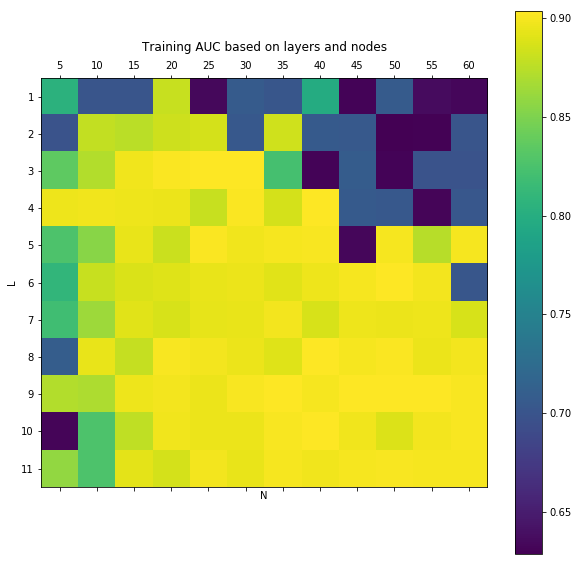

Train AUC: [[0.80583822 0.70069383 0.70157134 0.88042319 0.63448038 0.70723826
  0.70188243 0.79759246 0.63159903 0.70769169 0.63629238 0.63362383]
 [0.69937424 0.87907796 0.87508131 0.88329202 0.88562639 0.70434535
  0.88361041 0.70616185 0.70582717 0.62847419 0.63048385 0.70133304]
 [0.83506883 0.87179056 0.89820604 0.90173055 0.90308373 0.902872
  0.82282268 0.63141071 0.70827057 0.63075099 0.69847343 0.6994609 ]
 [0.89718127 0.89793169 0.89636932 0.89616254 0.88093599 0.90223965
  0.8858365  0.90328723 0.70650037 0.70476796 0.63275454 0.70334453]
 [0.82689974 0.85450282 0.89425658 0.88228962 0.90198222 0.89792942
  0.90002444 0.90073663 0.63314025 0.90028873 0.87473805 0.900612  ]
 [0.80994556 0.88047478 0.88857665 0.89093229 0.89461592 0.89625352
  0.89138363 0.89732666 0.90003008 0.90385115 0.89862364 0.70254156]
 [0.81905591 0.86303885 0.89147886 0.88718482 0.89330159 0.8946326
  0.89879676 0.88724725 0.89674681 0.89620605 0.89726919 0.88669088]
 [0.70988972 0.89493156 0.8798636

In [30]:
l_ticks = [l + 1 for l in L]
f, ax = plt.subplots(1, 1, figsize=(10, 10))
cax = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_title("Training AUC based on layers and nodes")
ax.set_xlabel("N")
ax.set_ylabel("L")
ax.set_xlabel("N")
ax.set_ylabel("L")
ax.set_xticks(np.arange(0, 12, step=1))
ax.set_yticks(np.arange(0, 11, step=1))
ax.set_xticklabels(N)
ax.set_yticklabels(l_ticks)
plt.show()
print("Train AUC: {}".format(tr_auc))

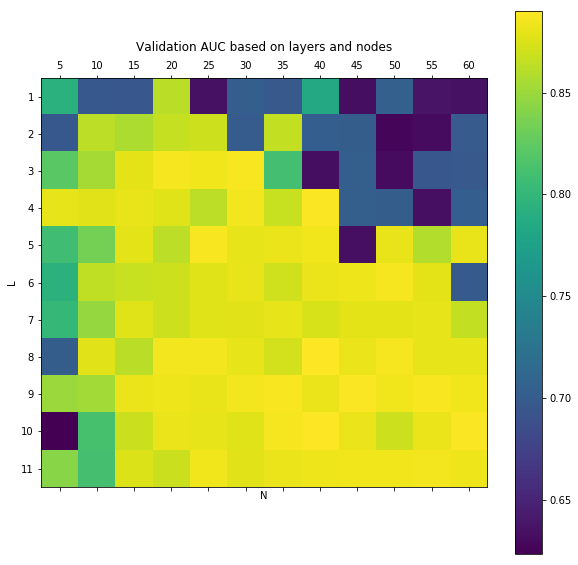

Validation AUC: [[0.79391266 0.69685836 0.69615756 0.86249731 0.63498528 0.70446588
  0.6979303  0.78385047 0.63315273 0.70491119 0.63687208 0.63529714]
 [0.69647526 0.8640571  0.85699299 0.86704427 0.8694346  0.70085899
  0.86570143 0.70297468 0.70181235 0.62721081 0.63139488 0.69983091]
 [0.82189339 0.85428443 0.87898793 0.88672652 0.88455792 0.88718486
  0.81053142 0.63319048 0.70356196 0.63137095 0.69591749 0.69775616]
 [0.8806211  0.87867794 0.88154336 0.87732154 0.86345599 0.88546742
  0.86748374 0.88842216 0.70399558 0.70175971 0.63403325 0.70247779]
 [0.80879909 0.83485049 0.87904695 0.86399675 0.88728216 0.88058361
  0.88216493 0.88450076 0.6339721  0.88137268 0.8598475  0.88130355]
 [0.79463552 0.86423735 0.86789263 0.87003597 0.87707907 0.88119056
  0.87127115 0.88194906 0.88349688 0.88654813 0.87911794 0.69902164]
 [0.80156829 0.84783658 0.87700889 0.87008515 0.87677865 0.8779814
  0.87990302 0.87378031 0.87970681 0.87974297 0.88073621 0.86626079]
 [0.70194236 0.87786761 0.

In [31]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_title("Validation AUC based on layers and nodes")
ax.set_xlabel("N")
ax.set_ylabel("L")
ax.set_xticks(np.arange(0, 12, step=1))
ax.set_yticks(np.arange(0, 11, step=1))
ax.set_xticklabels(N)
ax.set_yticklabels(l_ticks)
plt.show()
print("Validation AUC: {}".format(va_auc))